https://zh.wikipedia.org/zh-tw/Stable_Diffusion

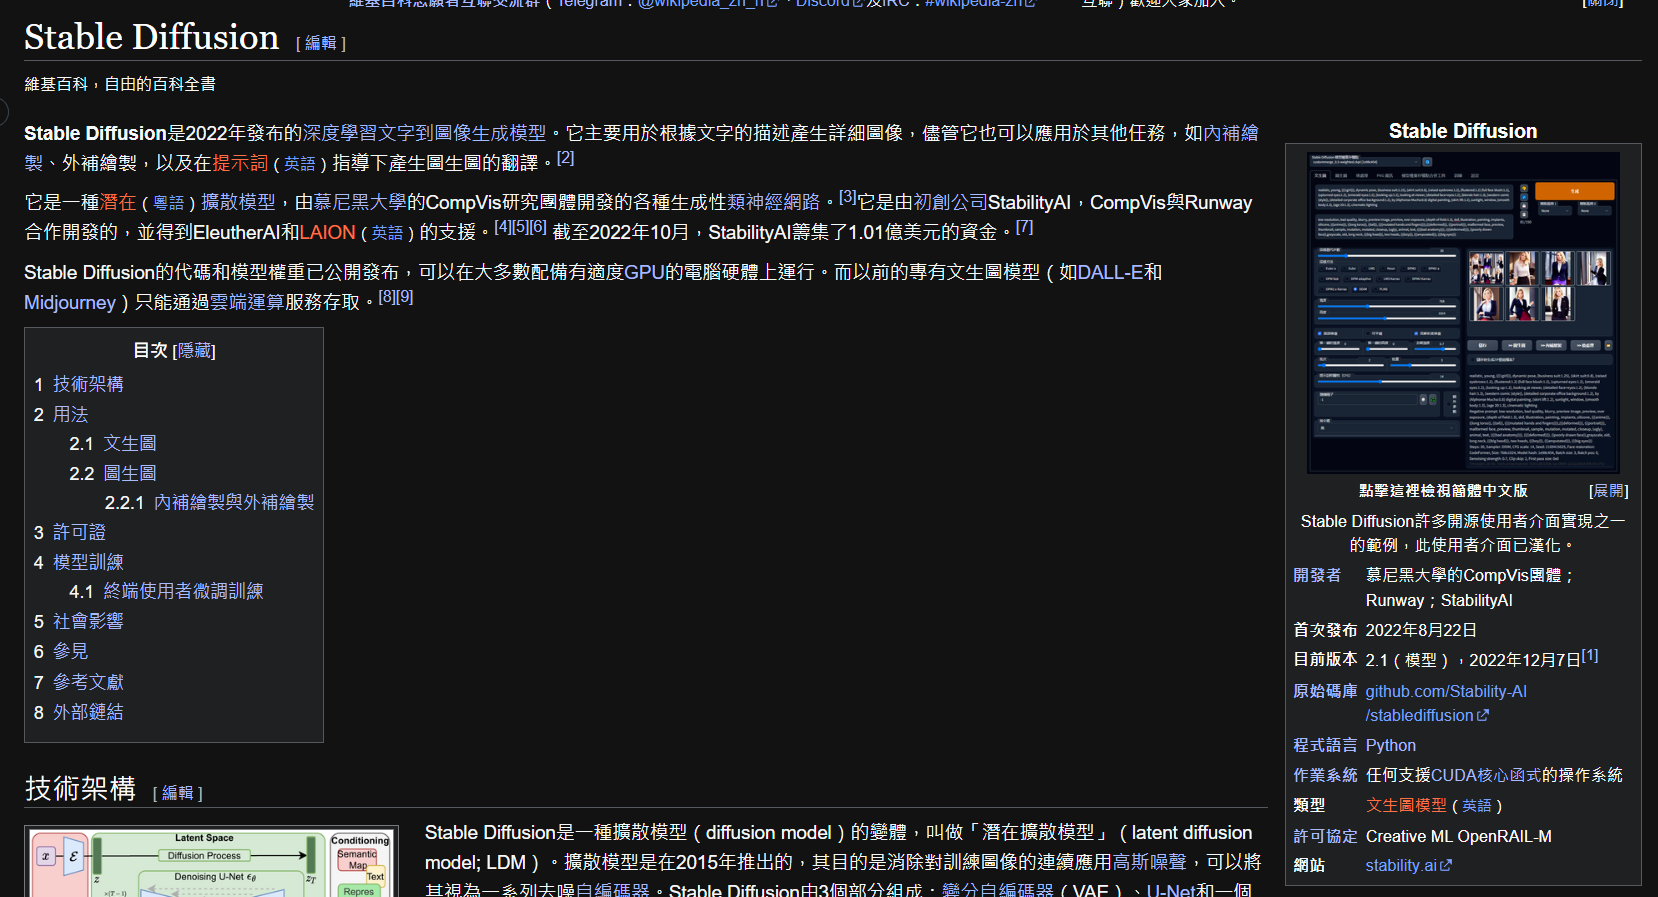

https://programmingforever.hatenablog.com/entry/2022/09/26/082408

多数存在するDiffusion用モデル

標準のStable Diffusion（現在1.4まで公開）に加えてWaifuやJapaneseなど色々とモデ

ルが登場している。

①Hugging Faceサイトに掲載：本家

CompVis/stable-diffusion-v1-4　→現在主流

CompVis/stable-diffusion-v1-3

CompVis/stable-diffusion-v1-2

CompVis/stable-diffusion-v1-1

CompVis/stable-diffusion

CompVis/stable-diffusion-v-1-4-original

CompVis/stable-diffusion-v-1-3-original

CompVis/stable-diffusion-v-1-2-original

CompVis/stable-diffusion-v-1-1-original

②Hugging Faceサイトに掲載：分家

hakurei/waifu-diffusion　→2次元の絵が得意

ayan4m1/trinart_diffusers_v2　→2次元の絵が得意

rinna/japanese-stable-diffusion　→プロンプトが日本語対応

lambdalabs/sd-pokemon-diffusers

lambdalabs/sd-image-variations-diffusers

doohickey/trinart-waifu-diffusion-50-50

pcuenq/stable-diffusion-v1-4

ttj/stable-diffusion-vae-anime

philschmid/stable-diffusion-v1-4-endpoints

osanseviero/test_stability

crumb/jit-traced-waifu-diffusion-unet

crumb/jit-traced-stable-diffusion-unet

jcplus/waifu-diffusion

naclbit/trinart_stable_diffusion

lambdalabs/stable-diffusion-image-conditioned

ShadowPower/waifu-diffusion.openvino

naclbit/trinart_stable_diffusion_v2

crumb/pruned-waifu-diffusion

johnslegers/stable-diffusion-v1-4

justinpinkney/pokemon-stable-diffusion

olympictafira/cAT

原理

https://zh.wikipedia.org/zh-tw/Stable_Diffusion

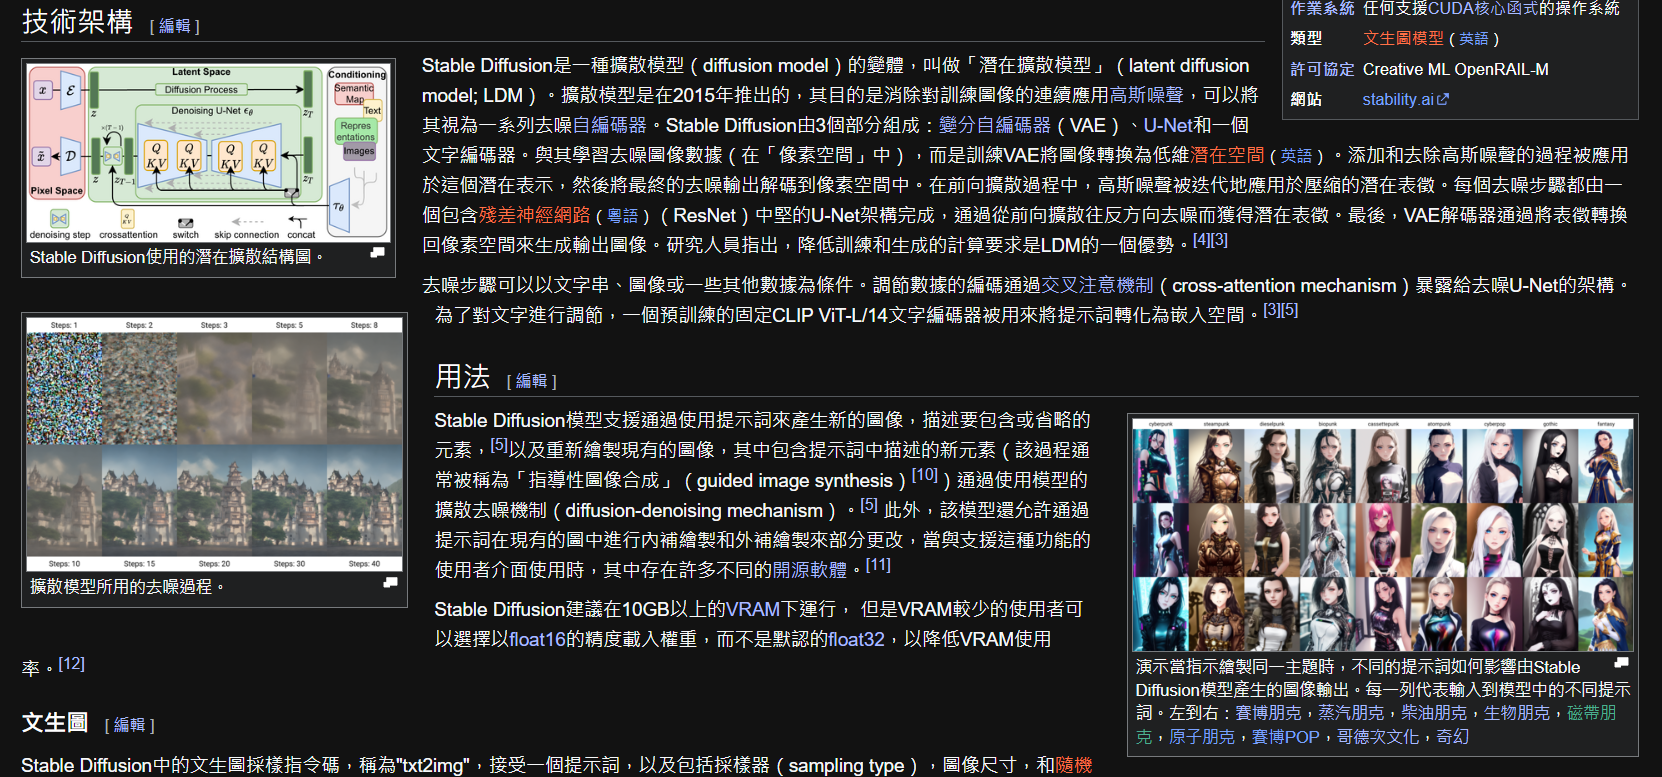

Stable Diffusion的推理過程

Ref: https://blog.51cto.com/u_15298598/5996371

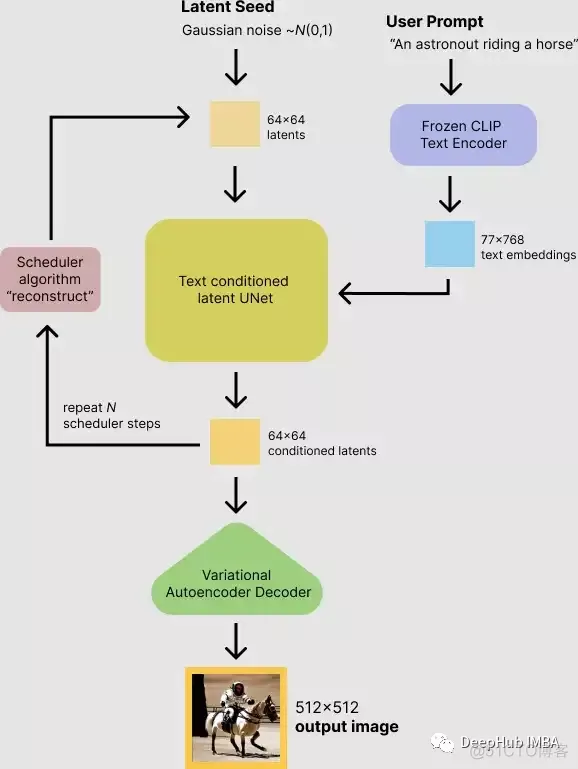

https://huggingface.co/docs/diffusers/index

Diffusers provides pretrained vision and audio diffusion models, and serves as a modular toolbox for inference and training.

More precisely, 🤗 Diffusers offers:

* State-of-the-art diffusion pipelines that can be run in inference with just a couple of lines of code (see Using Diffusers) or have a look at Pipelines to get an overview of all supported pipelines and their corresponding papers.

* Various noise schedulers that can be used interchangeably for the preferred speed vs. quality trade-off in inference. For more information see Schedulers.

* Multiple types of models, such as UNet, can be used as building blocks in an end-to-end diffusion system. See Models for more details

* Training examples to show how to train the most popular diffusion model tasks. For more information see Training.

* 只需要幾行代碼，就能夠利用擴散diffusion模型生成圖像

* 可以使用不同的“噪聲調節器”，來平衡模型生成速度和質量之間的關係

* 更有多種不同類型的模型，能夠端到端的構建diffusion模型

In [ ]:
#!pip install transformers
#!pip install diffusers
!pip install git+https://github.com/huggingface/transformers
!pip install git+https://github.com/huggingface/diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-pj67ctwc
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-pj67ctwc
  Resolved https://github.com/huggingface/transformers to commit 60d51ef5123d949fd8c59cd4d3254e711541d278
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 95.4 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.28.0.dev0-py3-none-any.whl size=6757627 sha256=27246404b0d9d6f03013e4e6bce2745727d2eff39d939bd0915de740dad3b799
  Stored in directory: /tmp/pip-ephem-wheel-cache-wo2z6xq4/wheels/14/a0/7b/8f6b25ba4110aa215fcb8d6aedd6cd4f9b9b6619190

範例程式:

https://huggingface.co/lambdalabs/sd-image-variations-diffusers

In [ ]:
from diffusers import StableDiffusionImageVariationPipeline
from PIL import Image
import torchvision.transforms as transforms

device = "cuda:0"
sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
  "lambdalabs/sd-image-variations-diffusers",
  revision="v2.0",
  )
sd_pipe = sd_pipe.to(device)

im = Image.open("image.jpg")
tform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(
        (224, 224),
        interpolation=transforms.InterpolationMode.BICUBIC,
        antialias=False,
        ),
    transforms.Normalize(
      [0.48145466, 0.4578275, 0.40821073],
      [0.26862954, 0.26130258, 0.27577711]),
])
inp = tform(im).to(device).unsqueeze(0)

out = sd_pipe(inp, guidance_scale=3)
out["images"][0].save("result.jpg")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

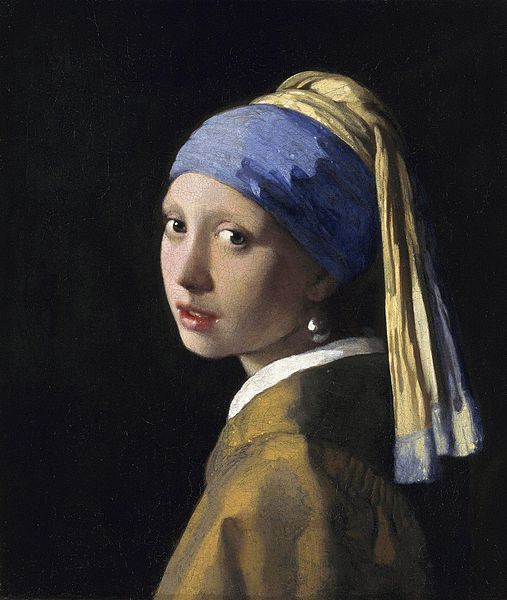

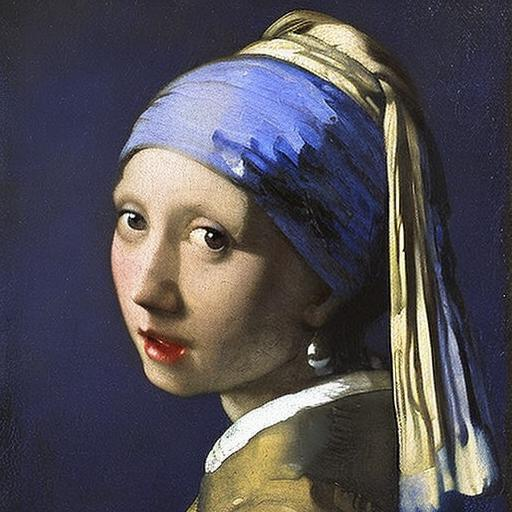

https://www.12-technology.com/2022/10/lambda-diffusers-pokemon-stable.html

https://github.com/LambdaLabsML/lambda-diffusers.git